# **Level Up: Exploring the World of Video Game Sales**
***
Author: Kellie Leopold    
Date: February 18th, 2025  

#### *Purpose*
Conduct an exploratory data analysis (EDA) project on video game sales data. Use GitHub for version control, Git for collaboration, and Jupyter Notebook along with pandas, Seaborn, and other popular data analytics tools to analyze trends and insights. 

### *Introduction*
Welcome to the ultimate "press start" moment of our data analysis adventure!

In this exploration, we’re diving into the world of console game sales, where the numbers are as varied as the genres of games themselves. From Mario’s iconic leaps to the epic battles in *The Legend of Zelda* (shout-out to *Ocarina of Time*!), the gaming industry has seen its fair share of highs, lows, and unexpected twists.

Behind every sold-out console and record-breaking title, there’s a story waiting to be told through the data. How do game sales stack up across platforms and regions? Which titles kept players hooked, and which consoles are leading the charge?

Grab your controller (or a cup of coffee) — let’s uncover the truth behind the numbers.

***

### **Imports**
* pandas
* pathlib
* Seaborn
* matplotlib.pyplot

In [15]:
import pandas as pd # Handles data manipulation and analysis
import pathlib # Manipulates file and directory paths
import seaborn as sns # Simplifies complex visualizations
import matplotlib.pyplot as plt # Basic tools for plotting and visualizing data
import numpy as np # Used for arrays

### **1. Load the Data**
***
* Load the CSV dataset downloaded from Kaggle.
* Inspect the first few lines of data to ensure they loaded correctly.

In [16]:
# Load dataset into pandas DataFrame
df = pd.read_csv('vgchartz-2024.csv')

# Display basic information about the dataset
df.columns

# Display the first few rows of the DataFrame
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### **2. Initial Data Inspection**
***
* Get rid of the decimal point in the Year column.
* Display the first 10 rows of the DataFrame.
* Check the shape.
* Display the data types of each column.

In [17]:
# Convert Year column to int64 to get rid of the decimal point
df['Year'] = df['Year'].apply(lambda x: int(x) if pd.notnull(x) else x) # Convert valid non-null entries to integers
df['Year'] = df['Year'].astype('Int64')

# Display the DataFrame
display(df.head(10))

# Display the data shape
print("Data Shape:", df.shape)

# Display the data type
print("Data Types:\n", df.dtypes)

# Inspect the data types of the columns with info() method
df.info()


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Data Shape: (16598, 10)
Data Types:
 Name             object
Platform         object
Year              Int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  Int64  
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), object(4)
memory usage: 1.3+ MB


### **3. Initial Descriptive Statistics**
***
Displays summary statistics for each column.

In [18]:
# Check the summary statistics for numerical columns
print(df.describe())

# Show the number of unique values in each column
print(df.nunique())  

              Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count      16327.0  16598.000000  16598.000000  16598.000000  16598.000000   
mean   2006.406443      0.264667      0.146652      0.077782      0.048063   
std       5.828981      0.816683      0.505351      0.309291      0.188588   
min         1980.0      0.000000      0.000000      0.000000      0.000000   
25%         2003.0      0.000000      0.000000      0.000000      0.000000   
50%         2007.0      0.080000      0.020000      0.000000      0.010000   
75%         2010.0      0.240000      0.110000      0.040000      0.040000   
max         2020.0     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  
Name            11493
Platform           31
Year               39
Genre              12
Publisher  

### **4. Initial Data Distribution for Numerical Columns**
***
* The first histogram represents the distribution of game release years, providing insight into the timing of title launches.
* Subsequent histograms focus on the remaining numerical columns, utilizing a logarithmic scale for better visualization of variations across different data ranges.

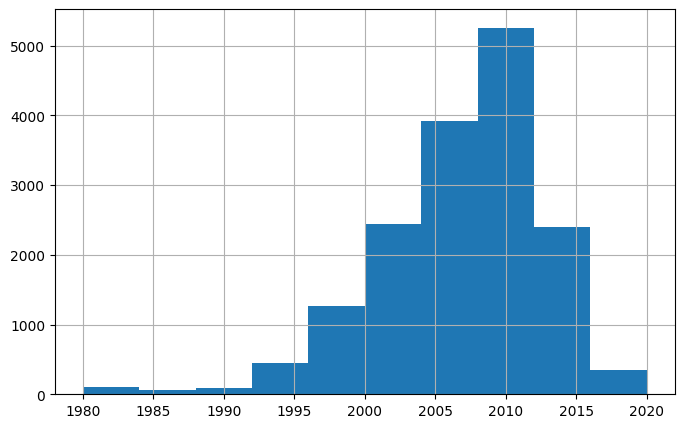

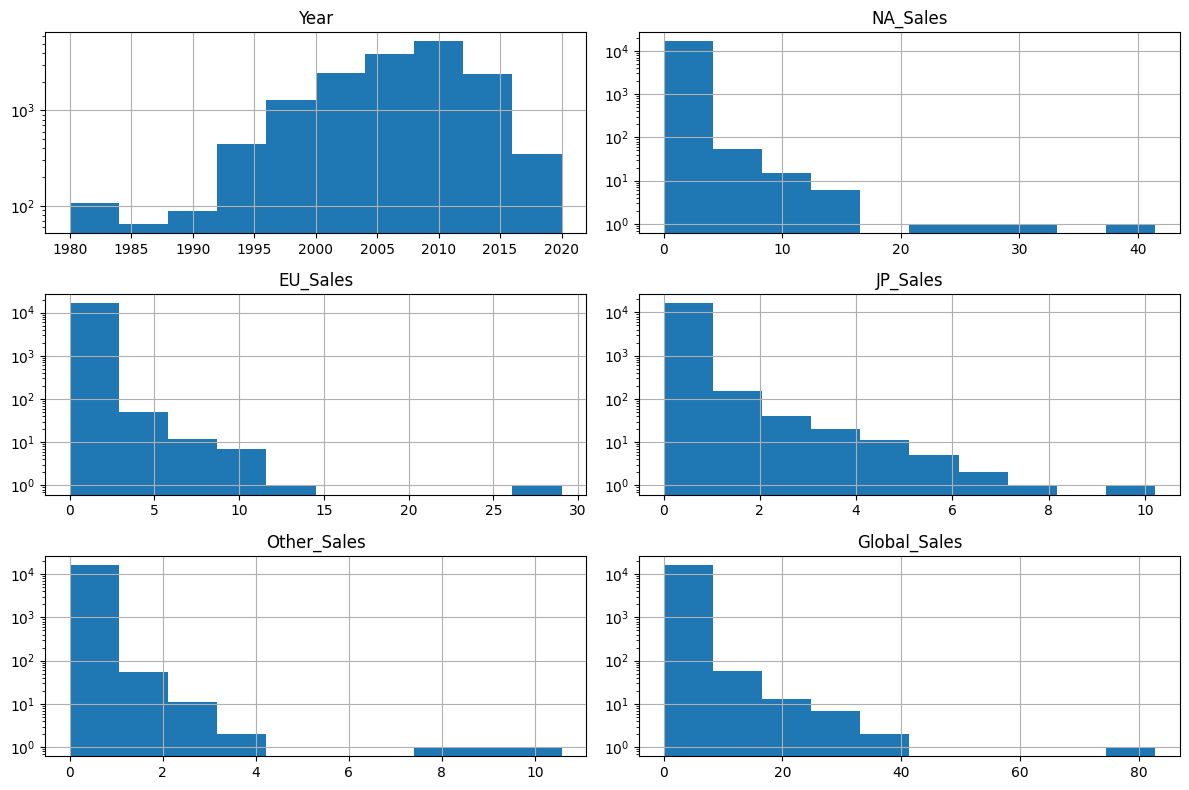

In [19]:
# Inspect histogram by numerical column
df['Year'].hist(figsize=(8,5))

# Plot histograms using a logarithmic scale for the x-axis
df.hist(figsize=(12, 8), bins=10, log=True)  # Log scale for better visualization
plt.tight_layout()
plt.show()

##### *Observations*:

1. Console Game Release Trends: Console game releases saw a significant surge in the mid-1990s, marking a period of rapid growth. However, this momentum began to slow in the early to mid-2010s, reflecting shifts in the gaming industry landscape.
2. Regional Sales Distribution: North America leads in total game sales, followed closely by Europe. Japan and the other regions come in third and fourth, respectively, showcasing regional differences in gaming preferences and sales volume.
3. Sales Thresholds Across Regions: Across all regions, most titles struggle to exceed `$5 million` in sales. Smaller markets like Japan and other regions typically see caps around `$1 million`, highlighting a narrower audience or market saturation.

#### **5. Initial Data Distribution for Categorical Columns**
***
* The first histogram shows the counts for the Genre column.
* Given the extensive number of game titles in this dataset, focusing on the minimum, median, and maximum values provided a more effective way to visualize the distribution of data across all the categorical columns. This approach allowed for a clear and concise representation of the extremes within each category, avoiding the clutter that could arise from including all entries.

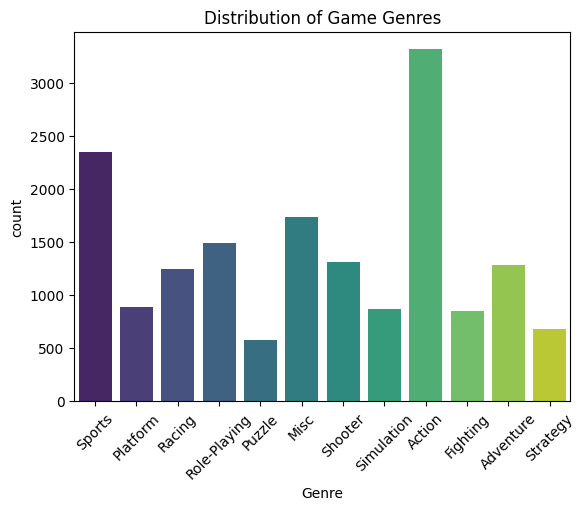

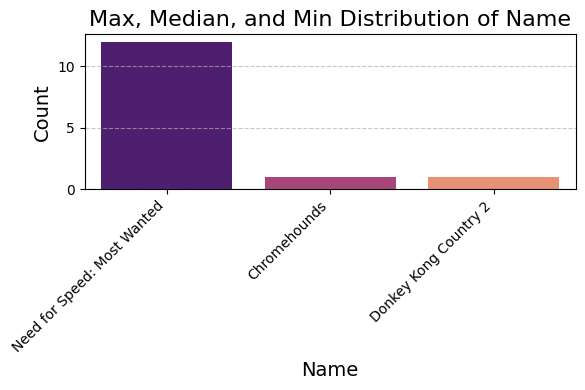

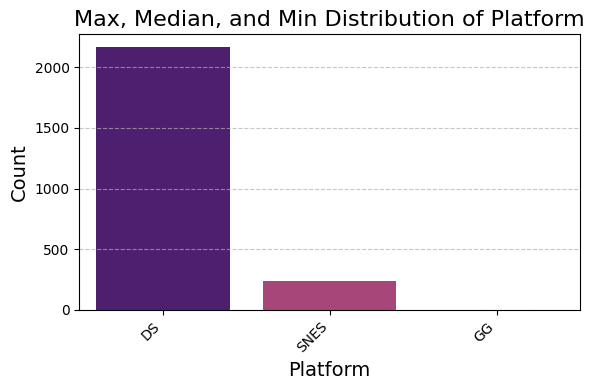

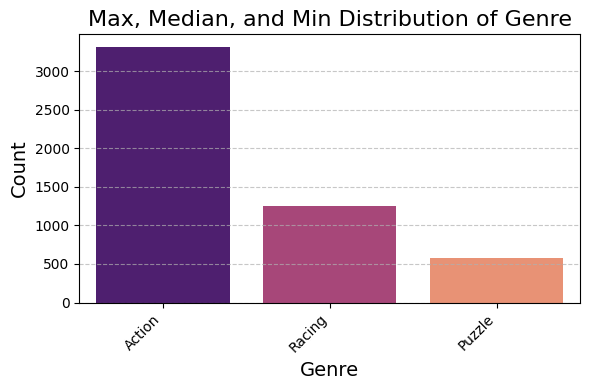

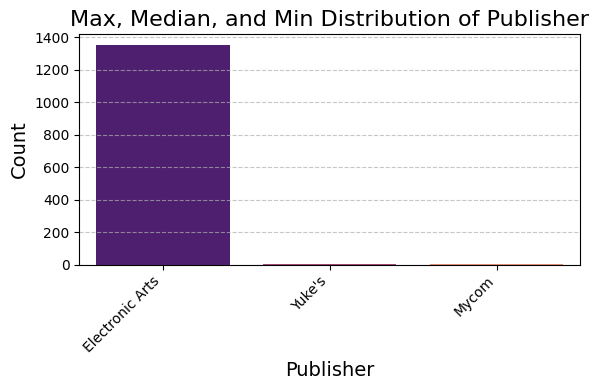

In [20]:
# Inspect value counts for the Genre categorical column
df['Genre'].value_counts()

# Display a count plot for the Genre column
sns.countplot(x='Genre', data=df, hue='Genre', palette="viridis", legend=False)

# Set title and show the plot
plt.title('Distribution of Game Genres')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Loop through all categorical columns in the dataset
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Get the value counts for the categorical column
    value_counts = df[col].value_counts()

    # Get the min, max, and median categories
    min_category, min_count = value_counts.idxmin(), value_counts.min()
    max_category, max_count = value_counts.idxmax(), value_counts.max()
    median_category, median_count = value_counts.index[len(value_counts) // 2], value_counts.iloc[len(value_counts) // 2]

    # Create a DataFrame with the max, median, and min values
    max_median_min_df = pd.DataFrame({
        'Category': [max_category, median_category, min_category],
        'Count': [max_count, median_count, min_count]
    })

    # Plot the max, median, and min counts in a single plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Category', y='Count', data=max_median_min_df, hue='Category', palette="magma", legend=False)
    
    # Rotate x-axis labels and improve visibility
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.title(f'Max, Median, and Min Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot for each categorical column
    plt.tight_layout()
    plt.show()

##### *Observations*:
1. Max vs. Median vs. Min: In all categorical columns, the maximum count of categories far exceeds both the median and minimum counts, highlighting a significant skew toward a small number of more prevalent categories.
2. Most and Least Available Titles: Need for Speed: Most Wanted stands out as the most widely available title across platforms, while Chromehounds and Donkey Kong Country 2 are nearly tied as the least available, showcasing an interesting contrast in popularity.
3. Platform Distribution: The Nintendo DS leads with the highest number of titles available, while older consoles like the Super Nintendo Entertainment System (SNES) and Game Gear (GG) trail behind, reflecting the enduring popularity of the DS compared to the retro appeal of the SNES and GG.
4. Genre Breakdown: There's a balanced distribution between the minimum and median genres, which primarily feature Racing and Puzzle games. However, Action games overwhelmingly dominate, far surpassing the others in availability.
5. Publisher Impact: Electronic Arts far outshines all other publishers, with a significantly larger number of titles available compared to both the median and minimum publishers. 
 

### **6. Initial Data Transformation and Feature Engineering**
***
* Rename the 'Platform' column to 'Console.
* Add an average sales column.

In [21]:
# Feature Engineering
# Renaming a column
df.rename(columns={'Platform': 'Console'}, inplace=True)

# Adding a new column
df['Avg_Sales'] = df['Global_Sales'] / 4

# Display changes
display(df.head(10))

,Name,Console,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Avg_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,20.6850
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,10.0600
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,8.9550
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,8.2500
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,7.8425
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,7.5650
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7.5025
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,7.2550
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,7.1550
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,7.0775
